<img src="https://upload.wikimedia.org/wikipedia/fr/b/bf/Universit%C3%A9_Laval_logo_et_texte.svg" width=600 align="right"><br>
<b> Physique numérique PHY-3500 </b><br>
<b> Physique, génie physique et optique </b><br>
<b> Hiver 2026 </b><br>
<b> Université Laval </b><br>


<h1><center> Travail Pratique 1 </center></h1>


## Identification
- Éloi Blouin : 536 999 917
- Clément Poulin : 536 994 304

In [160]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cte
import types
import pandas as pd
import scipy as sp
import math

plt.rcParams.update({'font.size': 14})

from ipywidgets import *
from typing import Callable
from scipy.stats import moyal
import matplotlib.pyplot as plt
import numpy as np
import timeit

In [161]:
def reset_globals_variables():
    """ Supprime toutes les variables globales sauf les fonctions et les modules importés """
    
    # Obtenir la liste des noms dans l'espace global
    current_globals = list(globals().keys())

    for name in current_globals:
        # 1. Skip names that start with an underscore (Python's convention for "internal" names)
        if name.startswith('_'):
            continue

        # 2. Get the object associated with the name
        obj = globals()[name]

        # 3. Skip imported packages (modules), functions, and classes
        if isinstance(obj, types.ModuleType) or isinstance(obj, types.FunctionType) or isinstance(obj, type):
            continue

        # 4. If it's a regular variable, delete it
        del globals()[name]


## Instructions pour la remise

Le travail devra être complété en trinômes sous format de cahier de bord jupyter (.ipynb) et remis dans la boîte de dépôt créée à cette fin. Ce document contiendra toutes informations pertinentes permettant au lecteur d'apprécier vos résultats et conclusions, incluant le code Python utilisé et d'éventuelles références bibliographiques. La qualité de la présentation est très importante (utilisation de sections, de graphiques appropriés, de mise en contexte, etc.).

Prenez soin de bien indiquer votre (ou vos) nom(s) dans le cahier de bord. Pour faciliter la tâche de classification, utilisez la nomenclature suivante pour le fichier transmis (un seul) :

TPn_nom1_nom2_nom3.ipynb

## Objectif

Déterminer la portée des protons dans matière par des méthodes d'intégration numérique. Se familiariser avec la protonthérapie.

## Introduction

La radiothérapie externe par faisceaux de rayons X , d'électrons ou de hadrons a pour but de détruire des cellules pathologiques (cancer par exemple) tout en épargnant les tissus sains environnants. L'éradication des cellules tumorales est effectuée par des dépôts d'énergies élevés lors du passage des photons/électrons/hadrons dans la matière (le corps). Pour effectuer des traitements optimaux, il convient d'adapter les faisceaux à la tumeur (forme, profondeur) pour administer la dose prescrite à la structure cible tout en préservant au maximum les tissus sains. La balistique doit être adéquate et optimisée au cas clinique à traiter et le physicien médical est le garant de la dose administrée aux volumes cibles et aux organes à risque. Le physicien médical est en quelque sorte le pharmacien de la radiation, étant responsable de son dosage.

La protonthérapie est une technique avancée de radiothérapie externe qui utilise des faisceaux de protons à des fins thérapeutiques. Elle est utilisée dans quelques dizaines de centres à travers le monde ${ }^{1}$. TRIUMF ${ }^{2}$ à Vancouver est le centre de référence au Canada en protonthérapie. Ce centre est en mesure de traiter des tumeurs peu profondes car la ligne de faisceau médicale permet des énergies de protons relativement faibles. Néanmoins, cette technologie est très efficace pour traiter certains mélanomes oculaires car les protons ont l'avantage de mieux préserver les tissus environnants, grâce à une balistique de traitement optimale. Ainsi, les patients peuvent être soignés sans que le nerf optique reçoive une dose de rayonnement trop grande, ce qui pourrait causer la cécité.

1. http://www.ptcog.ch/
2. http://www.triumf.ca/proton-therapy

On comprend qu'il est vital de pouvoir prédire et planifier la dose reçue par le patient. Dans ce contexte, la détermination de la portée des protons dans la matière en est le premier pas.

## Pouvoir d'arrêt collisionnel des protons

Le formalisme associé au pouvoir d'arrêt collisionnel (ou électronique) fut pour la première fois énoncé par Bethe en 1933 suite à un développement perturbatif en mécanique quantique sous l'approximation de Born au premier ordre. Il permet de calculer la perte d'énergie par unité de distance d'une particule chargée dans un milieu donné. Des développements additionnels ont été réalisés par Barkas et Bloch afin de tenir compte des limites de cette approximation au-delà du premier ordre ${ }^{3}$. Ces termes d'ordre supérieur deviennent significatifs pour des ions de faible vitesse. Le pouvoir d'arrêt collisionnel massique s'exprime par

$$
\begin{equation*}
\frac{S_{c o l}}{\rho}=-\left(\frac{d T}{\rho d x}\right)_{c o l}=N Z \int_{0}^{T_{e}^{\max }} T^{\prime}\left(\frac{d \sigma}{d T^{\prime}}\right)_{c o l} d T^{\prime} \tag{1}
\end{equation*}
$$

où

- $\frac{d \sigma}{d T}$ est la section efficace différentielle pour les collisions inélastiques résultant d'une énergie transférée $T^{\prime}$,
- $N$ est le nombre d'atomes par gramme,
- $T^{\prime}$ est l'énergie transférée à l'électron de l'atome,
- $T_{e}^{m a x}$ est l'énergie maximale transférable à un électron par le proton :

$$
\begin{equation*}
T_{e}^{\max }=\frac{2 m_{e} c^{2}\left(\gamma^{2}-1\right)}{1+2 \gamma \frac{m_{e}}{m_{p}}+\left(\frac{m_{e}}{m_{p}}\right)^{2}} \tag{2}
\end{equation*}
$$

avec $\gamma$ représentant le facteur de Lorentz, $m_{p}$ et $m_{e}$ étant respectivement les énergies de masse du proton et de l'électron.

Avec la correction du modèle en couches, d'effet de la polarisation et des corrections d'ordres supérieurs en $Z$, on obtient le pouvoir d'arrêt collisionnel pour les protons:

$$
\begin{equation*}
-\left(\frac{d T}{d x}\right)_{c o l}=2 \pi r_{e}^{2} m_{e} c^{2} n_{e} \frac{Z^{2}}{\beta^{2}}\left[\ln \left(\frac{2 m_{e} c^{2}\left(\gamma^{2}-1\right) T_{e}^{\max }}{I^{2}}\right)-2 \beta^{2}-\delta-2 \frac{C}{Z}+2 Z L_{1}+2 Z^{2} L_{2}\right], \tag{3}
\end{equation*}
$$

avec

- $r_{e}$ le rayon classique de l'électron,
- $n_{e}$ la densité électronique du matériau,
- $Z$ la charge de la particule ( $Z=1$ pour les protons),
- $I$ l'énergie moyenne d'excitation du matériau, accessible sur [?],
- $\beta$ et $\gamma$ les facteurs de Lorentz,
- $\delta$ un terme considérant les effets de la polarisation,
- $2 \frac{C}{Z}$ un terme corrigeant des effets du modèle en couches du cortège électronique atomique,
- $Z L_{1}$ la correction de Barkas, souvent nommée d'ordre 1 en Z mais, qui en réalité, induit une dépendance en $Z^{3}$,
- $Z^{2} L_{2}$ la correction de Bloch, nommée d'ordre 2 en Z d'où une dépendance en $Z^{4}$.

Il est d'usage de négliger les termes correctifs pour les protons de plus de $\mathbf{3 ~ M e V}$ en protonthérapie, ce qui mène à

$$S_{c o l}(T)=2 \pi r_{e}^{2} m_{e} c^{2} n_{e} \frac{1}{\beta^{2}}\left[\ln \left(\frac{\left.2 m_{e} c^{2} \beta^{2} \gamma^{2} T_{e}^{\max }\right)}{I^{2}}\right)-2 \beta^{2}\right] \tag{4}$$

Dans cet expression, le matériau dans lequel se propage la particule chargée est défini par les termes $n_{e}$ et $I$ seulement. Ce modèle explique bien les données expérimentales pour les protons de plus de 3 MeV ; aussi, dans ce TP, on utilisera cette valeur comme borne d'intégration. Le biais introduit dans les résultats par cette approximation ne vous sera pas reproché.

Les particules chargées se propageant dans la matière peuvent aussi engendrer des interactions nucléaires et subir des pertes radiatives (surtout pour les particules légères comme les électrons) mais dans ce TP, seul le pouvoir d'arrêt collisionnel (électronique) sera considéré.

En général, les accélérateurs dédiés à la protonthérapie produisent des faisceaux de particules dans la gamme $70-250 \mathrm{MeV}$. En première appoximation, on peut considérer les humains comme étant constitués d'eau liquide.


## **Questions 1.**
**Exprimez la densité électronique $n_{e}$ d'un milieu en fonction de sa composition atomique et de sa masse volumique $\rho$, et calculer $n_{e}$ pour l'eau (liquide) et l'os compact (définition de l'ICRU). On s'appuiera sur les données du NIST ${ }^{4}$ pour les compositions atomiques de ces matériaux. Vous trouverez aussi les énergies moyennes d'excitation $I$ de ces matériaux sur le site du NIST. Tracez les courbes des pouvoirs d'arrêt collisionnel pour ces milieux. On utilisera une échelle logarithmique en abscisse.**

Le nombre d'électrons dans un échantillon est la somme du nombre d'électrons que possède chaque élément constituant l'échantillon. Un échantillon ne contenant que de l'hydrogène ne possède que $N$ électrons, où $N$ est aussi le nombre d'atomes d'hydrogène contenus dans l'échantillon. Dans une mole, il y a un nombre d'Avogadro $N_A$ d'atomes.

Le nombre d'électrons par gramme d'un élément $i$ est
$$ n_i = \cfrac{N_A Z_i}{A_i}  \quad \left[ \frac{\rm{atome}}{\rm{mole}} \frac{\rm{électron}}{\rm{atome}}\frac{\rm{mole}}{g}  = \frac{e^-}{g}\right]$$

avec $Z_i$ le nombre d'électrons de l'élément $i$, i.e. son numéro atomique, et $A_i$ la masse molaire de cet élément.

Dans un échantillon, le nombre d'électrons total est donc
$$
n = N_A\sum_i\omega_i\cfrac{Z_i}{A_i}
$$

où $\omega_i$ est la fraction massique de chaque élément.

La densité électronique est alors
$$n_e = \rho N_A\sum_i\omega_i\cfrac{Z_i}{A_i} \quad \left[ \frac{e^-}{\rm{m}^3} \right] $$

avec $ρ$ la densité masse volumique en $[\frac{g}{\rm{m}^3}]$

On retrouve les facteurs de Lorentz $β$ et $γ$ à partir de l'équation
$$ β = \frac{v}{c} \quad\quad γ = \frac{1}{\sqrt{1 - \frac{v^2}{c^2 }} } =\frac{1}{\sqrt{1 - β^2} } $$
avec l'énergie totale d'une particule étant la somme de son énergie cinétique et de son énergie au repos en joules 
$$ E = E_C + E_0 = \frac{1}{2}mv^2 + mc^2  = γ m_0c^2 $$

En isolant le facteur de Lorentz, on obtiens

$$ γ = \frac{E_c}{m_0 c^2} + \frac{E_0}{m_0c^2}  = \frac{E_c}{m_0 c^2} + 1 $$

Si l'on veut le facteur de Lorentz pour une énergie en électronvolts $T$, on multiplie par la charge élémentaire e.
$$ γ  = \frac{T⋅e}{m_0 c^2} + 1 $$

Et finalement, le facteur beta se trouve avec
$$ β = \sqrt{1 - \frac{1}{γ^2}} $$
https://cds.cern.ch/record/2874048/files/PS-PA-Note-95-26.pdf

In [162]:
def calculate_n_e(rho: float, w_is: np.ndarray, Z_is: np.ndarray, A_is: np.ndarray) -> float:
    """
    Calculates the electronic density of a given material based on its mass density and atomic constituants

    :param rho: mass density of the material [kg/m^3]
    :param w_is: mass fractions of the constituant elements
    :param Z_is: atomic numbers of the constituant elements
    :param A_is: atomic masses of the constituant elements [g/mol]

    :return: electronic density of the material [e-/m^3]
    :rtype: float
    """
    # asserts
    try:
        assert isinstance(w_is, np.ndarray)
        assert isinstance(Z_is, np.ndarray)
        assert isinstance(A_is, np.ndarray)
    except Exception as e:
        print(e)

    # calculate n_e
    return 1e3 * rho * cte.N_A * np.sum(w_is * Z_is / A_is)    # 1e3 -> g to kg


def calculate_lorentz_factors(T: np.ndarray) -> list[np.ndarray, np.ndarray]:
    """
    calculates the lorentz beta and gamma factors for a proton with a given kinetic energy T

    :param T: kinetic energy of the proton [J]

    :return: lorentz beta and gamma factors [-]
    :rtype: list[np.ndarray, np.ndarray]
    """
    # asserts
    assert isinstance(T, np.ndarray)

    # calculate lorentz factors
    gamma = 1 + T / (cte.m_p * cte.c ** 2)
    beta = np.sqrt(1 - 1 / gamma ** 2)

    return [beta, gamma]


def calculate_S_col(n_e: float, I: float, T: float | np.ndarray) -> np.ndarray:
    """
    calculates the collisional stopping power of a specified material

    :param n_e: electronic density of the material [m^-3]
    :param I: mean excitation energy of the material [J]
    :param T: kinetic energy of the proton [J]

    :return: numpy array of the collisional stopping power [J/m]
    :rtype: np.ndarray
    """
    # asserts
    assert isinstance(n_e, float)
    assert isinstance(I, float)
    T = np.asarray(T)

    # calculate constants
    r_e = cte.physical_constants['classical electron radius'][0]
    beta, gamma = calculate_lorentz_factors(T=T)
    T_e_max = (2 * cte.m_e * (cte.c ** 2) * ((gamma ** 2) - 1)) / (1 + 2 * gamma * (cte.m_e / cte.m_p) + (cte.m_e / cte.m_p) ** 2)

    # calculate S_col [J/m]
    return 2 * cte.pi * (r_e ** 2) * cte.m_e * (cte.c ** 2) * n_e * (1 / (beta ** 2)) * (np.log((2 * cte.m_e * (cte.c ** 2) * (beta ** 2) * (gamma ** 2) * T_e_max) / (I ** 2)) - 2 * (beta ** 2))

electronic density of water: 3.342783219356227e+29 e⁻/m³
electronic density of bone: 5.905866655971463e+29 e⁻/m³


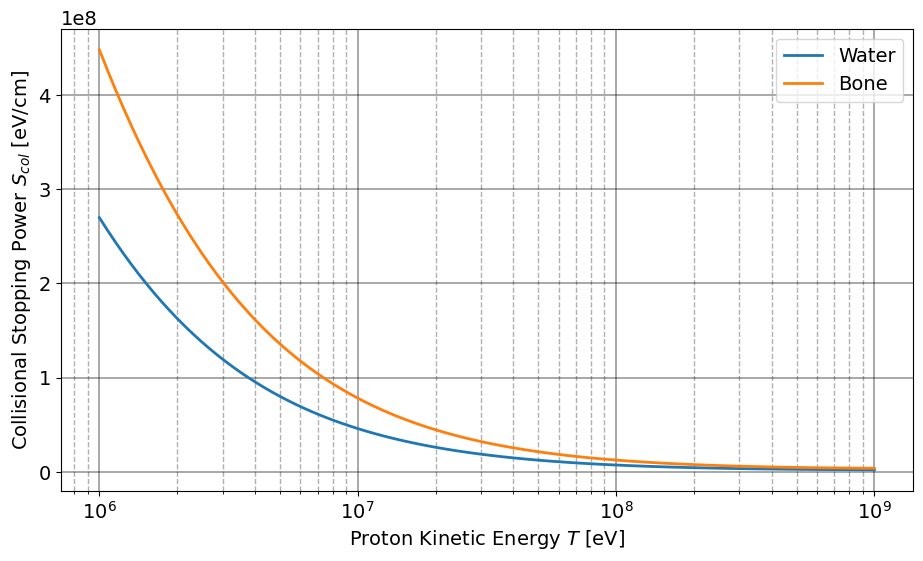

In [163]:
water_density = 1.0e3                           # [kg/m^3]
water_mean_excitation_energy = 75.00 * cte.e    # [J]

water_Z_is = np.array([1, 8])
water_w_is = np.array([0.111894, 0.888106])
water_A_is = np.array([1.00794, 15.9994])

# bone data
bone_density = 1.85e3                          # [kg/m^3]
bone_mean_excitation_energy = 91.90 * cte.e    # [J]

bone_Z_is = np.array([1, 6, 7, 8, 12, 15, 16, 20])
bone_w_is = np.array([0.063984, 0.278000, 0.027000, 0.410016, 0.002000, 0.070000, 0.002000, 0.147000])
bone_A_is = np.array([1.00794, 12.011, 14.0067, 15.9994, 24.305, 30.97376, 32.066, 40.078])

Ts_eV = np.geomspace(1, 1000, 100) * 1e6    # 3e6 eV -> 1e9 eV
Ts_J = cte.e * Ts_eV                        # même range, mais en J

conv_factor = (1 / cte.e) * 1e-2    # J/m -> eV/cm

# calculate n_e for both meterials
water_n_e = calculate_n_e(
    rho=water_density,
    w_is=water_w_is,
    Z_is=water_Z_is,
    A_is=water_A_is
)
bone_n_e = calculate_n_e(
    rho=bone_density,
    w_is=bone_w_is,
    Z_is=bone_Z_is,
    A_is=bone_A_is
)
print(f"electronic density of water: {water_n_e} e⁻/m³\nelectronic density of bone: {bone_n_e} e⁻/m³")

# calculate S_col for both meterials
water_Scol = calculate_S_col(n_e=water_n_e, I=water_mean_excitation_energy, T=Ts_J)
bone_Scol = calculate_S_col(n_e=bone_n_e, I=bone_mean_excitation_energy, T=Ts_J)

plt.figure(figsize=(11, 6))

plt.plot(Ts_eV, water_Scol * conv_factor, lw=2, label="Water")
plt.plot(Ts_eV, bone_Scol * conv_factor, lw=2, label="Bone")

plt.xlabel(r"Proton Kinetic Energy $T$ [eV]")
plt.ylabel(r"Collisional Stopping Power $S_{col}$ [eV/cm]")
plt.xscale('log')

plt.grid(True, which='major', linestyle='-', linewidth=1.2, alpha=0.4, color='k')
plt.grid(True, which='minor', linestyle='--', linewidth=1)
plt.legend()
plt.show()

## **Portée des protons dans la matière**

**L'approximation d'une décélération continue (CSDA) des protons dans la matière, en ligne droite, permet de calculer leur portée dans le milieu considéré. La portée par CSDA ( $R_{C S D A}$ ) est obtenue en intégrant l'inverse du pouvoir d'arrêt total par rapport à l'énergie :**

$$
\begin{equation*}
R_{C S D A}=\int_{0}^{T_{i}} \frac{\mathrm{dT}^{\prime}}{\frac{S_{c o l}}{\rho}} \tag{5}
\end{equation*}
$$

## **Questions 2.**
**Déterminer l'homogénéité dimensionnelle de $R_{C S D A}$ et expliquer en quelques phrases ce que représente l'équation 5 .**


L'homogénéité dimensionnelle est le principe qui dicte que les deux membres d'une égalité doivent avoir la même dimension, soit les mêmes unités.

Il faut donc vérifier le terme de droite, soit l'intégrale, afin de déterminer la dimension de la portée par CSDA.
$$ R_{CSDA} = \int_0^{T_i}\cfrac{\rho}{S_{col}}\mathrm{dT'} $$

L'élément différentiel $\mathrm{dT'}$ a des unités d'énergie, en joules $J$. L'intégrande a des unités de
$$ \cfrac{kg/m^3}{J/m} \quad\Rightarrow\quad \cfrac{kg}{J\cdot m^2} $$

Le terme de droite a donc la dimension $kg/m^2$, ce qui fait que la portée par CSDA $R_{CSDA}$ est en $kg/m^2$.

L'équation 5 sert à universaliser les mesures de pénétration des protons dans un matériau. L'analyse dimensionnelle révèle que sa dimension est une masse par surface, ce qui revient à dire qu'un proton d'énergie $T$ sera arrêté par n'importe quelle surface dont la masse par surface donnée est équivalente à sa portée $R_{CSDA}$. Ainsi, une particule ayant une portée de $5\:kg/m^2$ sera arrêtée par n'importe quel matériau ayant cette propriété, soit par exemple une plaque d'acier d'épaisseur $x$ ou une couche d'air d'épaisseur $y$. L'air étant moins dense, il faudra que $y$ soit bien plus élevé que $x$ pour atteindre le $5\ \rm{kg}/\rm{m}^2$ voulu.

## **Questions 3.**
**Justifiez que pour les protons, le pouvoir d'arrêt total est bien approximé par le pouvoir d'arrêt collisionnel aux énergies de la protonthérapie. Discutez des deux autres composantes négligées ici : réactions nucléaires et pertes radiatives. Aide : prendre l'exemple de l'eau et appuyez-vous sur PSTAR du NIST ${ }^{5}$.**

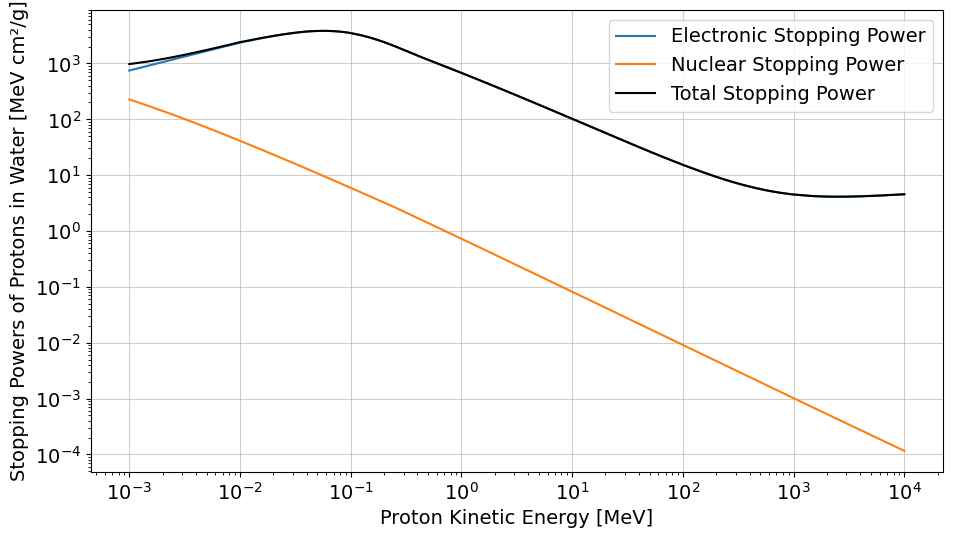

In [164]:
column_names = [
    "Kinetic_Energy_MeV", 
    "Electronic_Stopping_Power_MeV_cm2_g", 
    "Nuclear_Stopping_Power_MeV_cm2_g", 
    "Total_Stopping_Power_MeV_cm2_g"
]

data_df = pd.read_csv("Q3_PSTAR Stopping Powers and Range Tab.txt", sep=r"\s+", skiprows=8, names=column_names, engine='python')
T, ESP, NSP, TSP = data_df[column_names[0]].to_numpy(), data_df[column_names[1]].to_numpy(), data_df[column_names[2]].to_numpy(), data_df[column_names[3]].to_numpy()

plt.figure(figsize=(11, 6))

plt.plot(T, ESP, label=f"{column_names[1][:-10].replace('_', ' ')}")
plt.plot(T, NSP, label=f"{column_names[2][:-10].replace('_', ' ')}")
plt.plot(T, TSP, 'k', label=f"{column_names[3][:-10].replace('_', ' ')}")

plt.xscale('log')
plt.yscale('log')

plt.ylabel("Stopping Powers of Protons in Water [MeV cm²/g]")
plt.xlabel("Proton Kinetic Energy [MeV]")
plt.grid(alpha=0.6)
plt.legend()
plt.show()

In [165]:
# at 100Mev
idx = np.where(T == 100)[0]
print(f"Fraction du pouvoir d'arrêt total qui provient des collisions: {(ESP[idx] / TSP[idx])[0] * 100:.3f}%")
print(f"Fraction du pouvoir d'arrêt total qui provient du nucléaire : {(NSP[idx] / TSP[idx])[0] * 100:.3f}%")

Fraction du pouvoir d'arrêt total qui provient des collisions: 99.935%
Fraction du pouvoir d'arrêt total qui provient du nucléaire : 0.059%


Le graphique et les données du PSTAR démontrent que pour les protons aux énergies utilisées en protonthérapie, le pouvoir d’arrêt total est presque exclusivement dicté par le pouvoir d’arrêt collisionnel. À 100 MeV, les données indiquent que le pouvoir d'arrêt nucléaire ne représente que 0,059 % de la perte d'énergie totale, ce qui rend cette composante négligeable dans le calcul de la portée. Quant aux pertes radiatives par rayonnement de freinage (bremsstrahlung), elles sont physiquement insignifiantes pour les protons, car ce mécanisme est inversement proportionnel au carré de la masse de la particule
$$
S_{rad} \propto \cfrac{1}{m^2}
$$

Le proton étant environ 1836 fois plus massif que l'électron, il ne rayonne pratiquement pas d'énergie à basse énergie. Enfin, bien que des réactions nucléaires non élastiques se produisent, elles entraînent principalement une atténuation de l'intensité du faisceau ou la production de particules secondaires plutôt qu'un changement significatif du processus de ralentissement continu, confirmant ainsi que l'approximation $S_{tot} \approx ​S_{col}$​ est robuste.

## **Questions 4.**
**Justifiez la nécessité d'employer une méthode numérique pour calculer la portée des protons.**

L'emploi d'une méthode numérique est indispensable, car la portée des protons est définie par l'intégrale de l'inverse du pouvoir d'arrêt ($1/S_E$), une grandeur physique régie par la formule de Bethe-Bloch définie plus haut et qui ne possède pas de primitive analytique simple. La complexité mathématique de cette fonction, qui inclut des variations logarithmiques et des dépendances non linéaires selon l'énergie, rend la résolution analytique impossible, ce qui force l'utilisation des méthodes d'intégration numérique.

## **Questions 5.**
**Implémenter deux algorithmes d'intégration numérique pour calculer la portée des protons dans l'eau et dans l'os compact; le premier avec la méthode des trapèzes et le second avec la méthode de Simpson. Considérez des protons de 150 MeV . Tracez un graphique de la portée calculée par chaque méthode en fonction du nombre d'échantillons (de tranches) considéré. On déterminera à l'avance le nombre de tranches nécessaires pour atteindre une erreur de l'ordre de la précision machine en Python, et on utilisera ce nombre (où un nombre de cet ordre de grandeur) comme valeur maximale (il y aura une valeur maximale pour la méthode des trapèzes et une autre pour la méthode de Simpson). Votre graphique comprendra des points choisis de façon à bien représenter le comportement de vos algorithmes (des échelles logarithmiques pourraient être nécessaires). Doubler le nombre de tranches entre chaque évaluation pourrait s'avérer judicieux pour les questions suivantes.**

L'erreur totale avec la méthode des trapèzes est donnée par
$$
\varepsilon = \cfrac{C}{N^2} + \epsilon\sqrt{N}
$$

avec $N$ le nombre de tranches et $\epsilon$ l'erreur machine, soit $10^{-16}$.

Pour la méthode de simpson, elle suit l'équation
$$
\varepsilon = \cfrac{C}{N^4} + \epsilon\sqrt{N}
$$

Dans les deux cas, $C$ est une constante qui dépend de la fonction intégrée, soit celle de la portée des protons dans ce cas-ci.

Il n'est pas très important d'en connaître la valeur puisque c'est la tendance des équations qui nous intéresse à des valeurs de $N$ élevées. Pour $N = 2^{20} = 1048576 \approx 10^6$, $\varepsilon$ tend vers $\epsilon\sqrt{N}$, soit $10^{-16}\cdot10^3 = 10^{-13}$. Pour obtenir une erreur équivalente à l'erreur machine sur notre résultat d'intégrale, il faudrait utiliser un nombre de tranches inférieur à quelques ordres de grandeur, entre 10 et 100 par exemple. Cela est impossible puisque dans un tel cas, le premier terme des équations ci-hautes domine.

In [166]:
def get_material_properties(material_name: str):
    """
    returns (rho, n_e, I) for the specified material
    """
    properties = {
        "water": (water_density, water_n_e, water_mean_excitation_energy),
        "bone": (bone_density, bone_n_e, bone_mean_excitation_energy)
    }
    return properties.get(material_name.lower())


def trapeze(function: Callable[[float], float], a: float, b: float, N: int) -> float:
    """
    approximates the definite integral of function from a to b using the Trapezoidal rule

    :param function: name of the function to integrate
    :param a: lower bound of integration
    :param b: upper bound of integration
    :param N: number of subdivisions

    :returns: calculated area
    :rtype: float
    """
    h = (b - a) / N

    s = 0.5 * function(a) + 0.5 * function(b)

    for k in range(1, N):
        s += function(a + k * h)

    return h * s


def simpson(function: Callable[[float], float], a: float, b: float, N: int) -> float:
    """
    approximates the definite integral of function from a to b using the Simpson's rule

    Note: N must be an even integer for this implementation of the Simpson's rule

    :param function: name of the function to integrate
    :param a: lower bound of integration
    :param b: upper bound of integration
    :param N: number of even subdivisions

    :returns: calculated area
    :rtype: float
    """
    h = (b - a) / N
    s1 = 0.0

    for k in range(1, N, 2):
        s1 += function(a + k * h)
    
    s2 = 0.0
    for k in range(2, N, 2):
        s2 += function(a + k * h)

    return (function(a) + function(b) + 4.0 * s1 + 2.0 * s2) * h / 3.0

    
def run_analysis(material_name, N_trap, N_simp):
    """
    runs the integration the specified material's CSDA range using both the trapeze and the simpson methods

    Note: N must be an even integer for this implementation of the Simpson's rule

    :param material_name: used material
    :param N_trap: number of subdivisions for the trapeze method
    :param N_simp: number of subdivisions for the simpson method

    :returns: array of the number of subdivisions as axis 0 and of the calculated array as axis 1
    :rtype: np.ndarray
    """
    rho, n_e, I = get_material_properties(material_name)
    f_inv_S = lambda T: (rho / calculate_S_col(n_e, I, T))    # [kg/J m^2]

    T_proton_low = 3e6 * cte.e       # MeV -> J
    T_proton_high = 150e6 * cte.e    # MeV -> J

    trap_results = np.array([trapeze(f_inv_S, T_proton_low, T_proton_high, n) for n in N_trap])    # [kg/m^2]
    simp_results = np.array([simpson(f_inv_S, T_proton_low, T_proton_high, n) for n in N_simp])    # [kg/m^2]
    
    return trap_results, simp_results

La précision machine sur un nombre flotant 64 bits ``float`` est de $ϵ = 5 × 10^{−16}$. On veut calculer l'erreur d'intégration à chaque fois que l'on double le nombre de tranches et s'arrêter lorsque ces deux erreurs sont du même ordre de grandeur.

L'erreur sur la i-ième estimation est
$$
ϵ_i = \cfrac{1}{3}(I_i - I_{i-1})
$$

où $I_i$ est le résultat de l'intégration et $I_{i-1}$ est le résultat de l'itération précédente avec la moitié du nombre de tranches.

In [167]:
def calculate_ϵ_trap(I_2N, I_N):
    """
    Return integration error estimate for scalars or arrays
    """
    I_2N = np.asarray(I_2N)
    I_N = np.asarray(I_N)
    return (1.0 / 3.0) * (I_2N - I_N)

def calculate_ϵ_simp(I_2N, I_N):
    """
    Return integration error estimate for scalars or arrays
    """
    I_2N = np.asarray(I_2N)
    I_N = np.asarray(I_N)
    return (1.0 / 15.0) * (I_2N - I_N)

R_CSDA for water with 2 slices (trapèze): [9.54226626e+18] g/cm²
current N: 4 -> 2^2
current N: 8 -> 2^3
current N: 16 -> 2^4
current N: 32 -> 2^5
current N: 64 -> 2^6
current N: 128 -> 2^7
current N: 256 -> 2^8
current N: 512 -> 2^9
current N: 1024 -> 2^10
current N: 2048 -> 2^11
current N: 4096 -> 2^12
current N: 8192 -> 2^13
current N: 16384 -> 2^14
current N: 32768 -> 2^15
current N: 65536 -> 2^16
current N: 131072 -> 2^17
current N: 262144 -> 2^18
current N: 524288 -> 2^19
current N: 1048576 -> 2^20


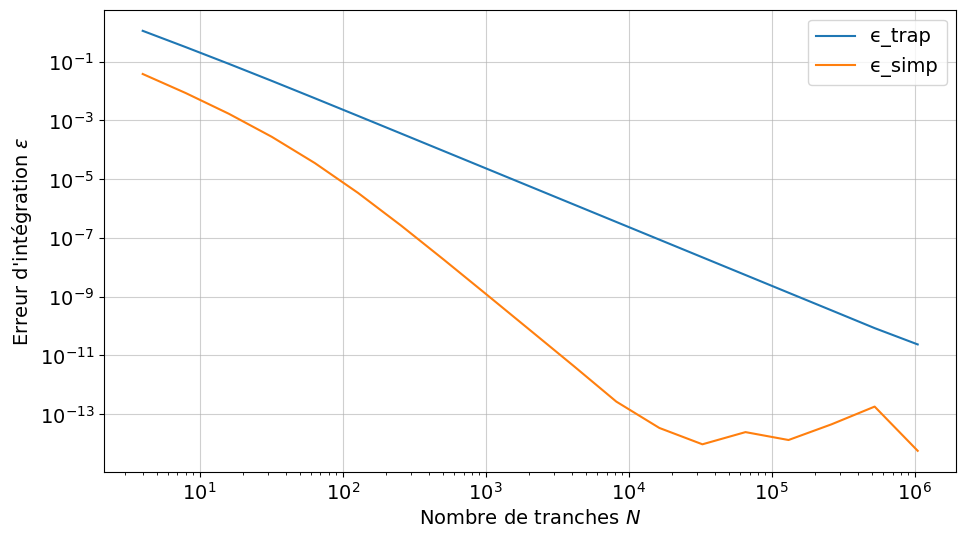

In [168]:
ϵ_limit = 5e-16

# bit shifting to have an array go from 2^1 -> 2^24 (16777216)
N = [1 << (i + 1) for i in range(20)]    # set range(24) for full test length

water_R_CSDA_trap_previous, water_R_CSDA_simp_previous = run_analysis("water", [N[0]], [N[0]])
print(f"R_CSDA for water with 2 slices (trapèze): {water_R_CSDA_trap_previous * conv_factor} g/cm²")

ϵ_trap = []
ϵ_simp = []
for k, i in enumerate(N[1:]):
    print(f"current N: {i} -> 2^{k + 2}")

    water_R_CSDA_trap, water_R_CSDA_simp = run_analysis("water", [i], [i])

    ϵ_trap.append(calculate_ϵ_trap(water_R_CSDA_trap, water_R_CSDA_trap_previous))
    ϵ_simp.append(calculate_ϵ_simp(water_R_CSDA_simp, water_R_CSDA_simp_previous))

    # update previous results
    water_R_CSDA_trap_previous = water_R_CSDA_trap
    water_R_CSDA_simp_previous = water_R_CSDA_simp

plt.figure(figsize=(11, 6))

plt.plot(N[1:], np.abs(ϵ_trap), label="ϵ_trap")
plt.plot(N[1:], np.abs(ϵ_simp), label="ϵ_simp")

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"Nombre de tranches $N$")
plt.ylabel(r"Erreur d'intégration $\epsilon$")

plt.legend()
plt.grid(alpha=0.6)
plt.show()

Voilà la méthode qui sera programmée. Pour atteindre la précision machine. On définit une fonction pour faire une ```while``` en doublant à chaque fois le nombre de rectangles. À chaque étape, on calcule l'erreur, on stocke aussi la valeur de l'intégrale dans un array pour ploter. Si l'erreur est plus grande que la limite que nous nous sommes mise, alors on augmente. 

In [169]:
def calculate_R_CSDA_until_machine_error(material_name: str, integration_method: str, ϵ_limit: float):
    rho, n_e, I = get_material_properties(material_name)
    f_inv_S = lambda T: (rho / calculate_S_col(n_e, I, T))    # [kg/J m^2]

    N = 2
    T_proton_low, T_proton_high = 3e6, 150e6
    R_CSDA_values, ϵ_values = [], []

    R_CSDA_previous = integration_method(f_inv_S, T_proton_low, T_proton_high, N)    # [kg/m^2]
    R_CSDA_values.append(R_CSDA_previous)

    # first error set at -infty
    ϵ_values.append(np.inf)

    while True:
        N *= 2
        print(f"current N: {N} -> 2^{int(np.log2(N))}")
        R_CSDA_current = integration_method(f_inv_S, T_proton_low, T_proton_high, N)    # [kg/m^2]
        R_CSDA_values.append(R_CSDA_current)
        
        if integration_method == trapeze:
            ϵ_current = calculate_ϵ_trap(R_CSDA_current, R_CSDA_previous)
        elif integration_method == simpson:
            ϵ_current = calculate_ϵ_simp(R_CSDA_current, R_CSDA_previous)
        else:
            raise ValueError("Invalid integration method. Choose 'trapeze' or 'simpson'.")
        
        ϵ_values.append(ϵ_current)
        print(f"ϵ_current: {ϵ_current}")
        # Break condition when the error is less than the specified limit
        if np.abs(ϵ_current) < ϵ_limit:
            break

        R_CSDA_previous = R_CSDA_current

    return N, R_CSDA_values, ϵ_values

In [170]:
ϵ_limit = 5e-12
ϵ_limit_2 = (np.finfo(float).eps)  # hardware fundamental epsilon for double precision

print(f"Machine epsilon for double precision: {ϵ_limit}")
print(f"Machine epsilon for double precision: {ϵ_limit_2}")

# N_simp_final, water_R_CSDA_simp_values, water_ϵ_simp_values = calculate_R_CSDA_until_machine_error("water", simpson, ϵ_limit)
# N_rect_final, water_R_CSDA_trap_values, water_ϵ_trap_values = calculate_R_CSDA_until_machine_error("water", trapeze, ϵ_limit)
# print(f"Final number of slices for Trapezoidal method to reach error < {ϵ_limit}: {N_rect_final}")
# print(f"Final number of slices for Simpson's method to reach error < {ϵ_limit}: {N_simp_final}")

Machine epsilon for double precision: 5e-12
Machine epsilon for double precision: 2.220446049250313e-16


In [171]:
# N_simp_final -> 8192
# N_rect_final -> 2097152

In [ ]:
N_simp_final = 8192
N_trap_final = 2097152

N_trap = [1 << i for i in range(1, N_trap_final.bit_length()) if (1 << i) <= N_trap_final]
N_simp = [1 << i for i in range(1, N_simp_final.bit_length()) if (1 << i) <= N_simp_final]

# Run analysis with the calculated ranges
water_R_CSDA_trap, _ = run_analysis("water", N_trap, [2])
_, water_R_CSDA_simp = run_analysis("water", [2], N_simp)

bone_R_CSDA_trap, _ = run_analysis("bone", N_trap, [2])
_, bone_R_CSDA_simp = run_analysis("bone", [2], N_simp)

conv_factor = 1e-1    # [kg/m^2] -> [g/cm^2]

plt.figure(figsize=(11, 6))

plt.plot(N_trap, water_R_CSDA_trap * conv_factor, 'b', ls='--', label="water_R_CSDA_trap")
plt.plot(N_simp, water_R_CSDA_simp * conv_factor, 'b', label="water_R_CSDA_simp")
plt.plot(N_trap, bone_R_CSDA_trap * conv_factor, 'k', ls='--', label="bone_R_CSDA_trap")
plt.plot(N_simp, bone_R_CSDA_simp * conv_factor, 'k', label="bone_R_CSDA_simp")

plt.xlabel(r"Nombre de tranches $N$")
plt.ylabel(r"$R_{CSDA}\quad$[g/cm$^2$]")

plt.xscale('log')

plt.grid(alpha=0.6)
plt.legend(loc='center right')
plt.show()

## **Questions 6.**
**Pour une méthode d'intégration numérique au choix, mesurez le temps de calcul en fonction du nombre de tranches $N$. Comparez les résultats obtenus sur au moins deux processeurs (CPU) et commentez les différences observées.**


In [ ]:
%%timeit -r 3 -n 1    # run cell 3 times with a repetition of 5

water_R_CSDA_trap, _ = run_analysis("water", N_trap, [2])    # trapèzeslower
pass

NameError: name 'N_trap' is not defined

In [ ]:
# Clément: intel® 14-core i5-13600KF @ 3.50 GHz        --> 17 s ± 263 ms
# Éloi:    Snapdragon(R) X 10-core X1P64100 @ 3.40 GHz --> 45.2 s ± 2.19 s
print(f"Augmentation de {(45.2/17 * 100):.1f} % du temps de calcul")

Augmentation de 265.9 % du temps de calcul


La cellule du haut s'éxécutera 3 fois de suite avant d'être re-répété 5 fois d'affiler. À chaque iteration, le nombre de temps requis pour faire le calcul est calculé avec son écart-type. Le nombre de trapèze intégrer à chaque fois est de 2097152. Le nombre de tranches pour Simpson est de 2 pour mesurer seulement le temps de l'intégration avec la méthode du trapèze.

On remarque une augmentation de $265\%$ entre le X10-core et le 13600. On observe que la performance d'un calcul numérique est fortement dépendante de la machine qui execute le code, ce qui n'est pas très surprenant. La différence de performance est princiaplement due à la fréquence d'horloge du processeur, au nombre de cœurs et à l'efficacité de l'architecture du CPU. Le processeur Snapdragon est un processeur mobile conçu pour l'efficacité énergétique, tandis que le processeur Intel i7 est un processeur de bureau plus puissant avec une architecture optimisée pour les performances. Durant ce test, le Snapdragon n'était pas branché à l'alimentaiton, il était à moins de 20% de batterie en mode économie d'énergie ce qui démontre que les conditions d'exécution du code peuvent aussi influencer les résultats obtenus. Une métrique plus important pour les ordinateur portables serait le nombre de secondes par watt consommé, mais ce n'était pas l'objectif de cette question.


REF: https://docs.python.org/3/library/timeit.html

## **Questions 7.**
**Établir l'expression analytique de la dérivée du pouvoir d'arrêt en fonction de $T$ et la tracer. On utilisera une échelle logarithme en abscisse. Aide : Exprimez le pouvoir d'arrêt en fonction de $\gamma$ et utiliser le théorème de dérivation des fonctions composées. Utilisez aussi les définitions suivantes pour simplifier la notation :**
$$
\begin{equation*}
T_{e}^{\max }=\frac{a\left(\gamma^{2}-1\right)}{b+\delta \gamma}, \quad \text { avec } \quad a=2 m_{e} c^{2}, \quad b=1+\left(\frac{m_{e}}{m_{p}}\right)^{2} \quad \text { et } \quad \delta=2 \frac{m_{e}}{m_{p}} . \tag{6}
\end{equation*}
$$
**et**
$$
\begin{align*}
U & =2 \pi r_{e}^{2} m_{e} c^{2} n_{e} \\
k & =\frac{a^{2}}{I^{2}} \tag{7}
\end{align*}
$$
**sachant aussi que**
$$
\begin{align*}
& T=(\gamma-1) m_{p} c^{2} \Rightarrow \gamma=\frac{T}{m_{p} c^{2}}+1  \tag{8}\\
& \gamma=\frac{1}{\sqrt{1-\beta^{2}}} \Rightarrow \gamma^{2} \beta^{2}=\left(\gamma^{2}-1\right) \tag{9}
\end{align*}
$$

Le pouvoir d'arrêt est défini comme
$$
S_{col}(T) = 2\pi r_e^2m_ec^2n_e\cfrac{1}{\beta^2}\left[\ln\left[\cfrac{2m_ec^2\beta^2\gamma^2T_e^{max}}{I^2}\right] - 2\beta^2\right]
$$

et
$$
\gamma = \cfrac{1}{\sqrt{1 - \beta^2}} \quad\Rightarrow\quad \gamma^2\beta^2 = \gamma^2 - 1 \quad\Rightarrow\quad \beta^2 = 1 - \cfrac{1}{\gamma^2}
$$

En l'exprimant en fonction de $\gamma$, l'expression suivante est obtenue
$$
\begin{align*}
	S_{col}(T) &= 2\pi r_e^2m_ec^2n_e\cfrac{1}{1 - \cfrac{1}{\gamma^2}}\left[\ln\left[\cfrac{2m_ec^2(\gamma^2 - 1)T_e^{max}}{I^2}\right] + \cfrac{2}{\gamma^2} - 2\right] \\ \\
			   &= \cfrac{U\gamma^2}{\gamma^2 - 1}\left[\ln\left[\cfrac{a(\gamma^2 - 1)T_e^{max}}{I^2}\right] + \cfrac{2}{\gamma^2} - 2\right] = \cfrac{U\gamma^2}{\gamma^2 - 1}\left[\ln\left[\cfrac{a(\gamma^2 - 1)}{I^2}\cfrac{a\left(\gamma^2 - 1\right)}{b + \delta\gamma}\right] + \cfrac{2}{\gamma^2} - 2\right] \\ \\
			   &= \cfrac{U\gamma^2}{\gamma^2 - 1}\left[\ln\left[\cfrac{a^2(\gamma^2 - 1)^2}{I^2(b + \delta\gamma)}\right] + \cfrac{2}{\gamma^2} - 2\right] = \cfrac{U\gamma^2}{\gamma^2 - 1}\left[\ln\left[\cfrac{k(\gamma^2 - 1)^2}{b + \delta\gamma}\right] + \cfrac{2}{\gamma^2} - 2\right] \\ \\
			   &= \cfrac{U\gamma^2}{\gamma^2 - 1}\ln\left[\cfrac{k(\gamma^2 - 1)^2}{b + \delta\gamma}\right] + \cfrac{2U}{\gamma^2 - 1} - \cfrac{2U\gamma^2}{\gamma^2 - 1} = \cfrac{U\gamma^2}{\gamma^2 - 1}\ln\left[\cfrac{k(\gamma^2 - 1)^2}{b + \delta\gamma}\right] + \cfrac{2U(1 - \gamma^2)}{\gamma^2 - 1} \\ \\
			   &= \cfrac{U\gamma^2}{\gamma^2 - 1}\ln\left[\cfrac{k(\gamma^2 - 1)^2}{b + \delta\gamma}\right] - 2U
\end{align*}
$$

La dérivation en chaîne permet de trouver la dérivée analytique par rapport à $T$ selon
$$
\cfrac{dS_{col}(T)}{dT} = \cfrac{dS_{col}(T)}{d\gamma}\cdot\cfrac{d\gamma}{dT}
$$

La seconde dérivée est facilement obtenue, soit
$$
\cfrac{d\gamma}{dT} = \cfrac{d}{dT}\left[1 + \cfrac{T}{m_pc^2}\right] = \cfrac{1}{m_pc^2}
$$

La première doit toutefois être décomposée comme
$$
\cfrac{dS_{col}(T)}{d\gamma} = \cfrac{d}{d\gamma}\left[\cfrac{U\gamma^2}{\gamma^2 - 1}\ln\left[\cfrac{k(\gamma^2 - 1)^2}{b + \delta\gamma}\right]\right] - \cfrac{d}{d\gamma}2U
$$

d'où
$$
\cfrac{d}{d\gamma}\left[\cfrac{U\gamma^2}{\gamma^2 - 1}\ln\left[\cfrac{k(\gamma^2 - 1)^2}{b + \delta\gamma}\right]\right] = \cfrac{U\gamma}{(\gamma^2 - 1)^2(b + \delta\gamma)}\left[\gamma\big[4b\gamma + \delta + 3\delta\gamma^2\big] - 2\big[b + \delta\gamma\big]\ln\left[\cfrac{k(\gamma^2 - 1)^2}{b + \delta\gamma}\right]\right]
$$

$$
\cfrac{d}{d\gamma}2U = 0
$$

et
$$
\cfrac{dS_{col}(T)}{d\gamma} = \cfrac{U\gamma}{(\gamma^2 - 1)^2(b + \delta\gamma)}\left[\gamma\big[4b\gamma + \delta + 3\delta\gamma^2\big] - 2\big[b + \delta\gamma\big]\ln\left[\cfrac{k(\gamma^2 - 1)^2}{b + \delta\gamma}\right]\right]
$$

De là, la dérivée recherchée est
$$
\begin{align*}
	\cfrac{dS_{col}(T)}{dT} &= \cfrac{U\gamma}{m_pc^2(\gamma^2 - 1)^2(b + \delta\gamma)}\left[\gamma\big[4b\gamma + \delta + 3\delta\gamma^2\big] - 2\big[b + \delta\gamma\big]\ln\left[\cfrac{k(\gamma^2 - 1)^2}{b + \delta\gamma}\right]\right] \\
							&= \cfrac{2\pi r_e^2m_en_e\gamma}{m_p(\gamma^2 - 1)^2\left(\cfrac{m_p^2}{m_p^2 + m_e^2} + \cfrac{2m_e}{m_p}\gamma\right)}\left[\gamma\left[\cfrac{4m_p^2\gamma}{m_p^2 + m_e^2} + \cfrac{2m_e}{m_p}\left[1 + 3\gamma^2\right]\right] - 2\left[\cfrac{m_p^2}{m_p^2 + m_e^2} + \cfrac{2m_e}{m_p}\gamma\right]\ln\left[\cfrac{4m_e^2c^4(\gamma^2 - 1)^2}{I^2\left[\cfrac{m_p^2}{m_p^2 + m_e^2} + \cfrac{2m_e}{m_p}\gamma\right]}\right]\right]
\end{align*}
$$

où tous les termes ont été remplacés par leur valeur. Ce n'est pas la formule qui sera programmé, ce sera plutôt l'avant dernière.

In [ ]:
def Scol_derivative(n_e: float, I: float, T: float | np.ndarray) -> float | np.ndarray:
    """
    calculates the derivative of the collisional stopping power of a specified material

    :param n_e: electronic density of the material [m^-3]
    :param I: mean excitation energy of the material [J]
    :param T: kinetic energy of the proton [J]
    
    :returns: derivative value or array for a specific energy or an energy array [m^-1]
    :rtype: float | np.ndarray
    """
    # constants
    pi, m_e, c, m_p = cte.pi, cte.m_e, cte.c, cte.m_p
    r_e = cte.physical_constants['classical electron radius'][0]
    _, gamma = calculate_lorentz_factors(T)

    # useful definitions
    a = 2 * m_e * c ** 2
    b = 1 + (m_e / m_p) ** 2
    delta = 2 * (m_e / m_p)
    U = 2 * pi * r_e ** 2 * m_e * c ** 2 * n_e
    k = a ** 2 / I ** 2

    fac1 = (U * gamma) / (m_p * c ** 2 * (gamma ** 2 - 1) ** 2 * (b + delta * gamma))
    fac2 = gamma * (4 * b * gamma + delta + 3 * delta * gamma ** 2)
    fac3 = -2 * (b + delta * gamma) * np.log((k * (gamma ** 2 - 1) ** 2) / (b + delta * gamma))

    return fac1 * (fac2 + fac3)

electronic density of water: 3.342783219356227e+29 e⁻/m³
electronic density of bone: 5.905866655971463e+29 e⁻/m³


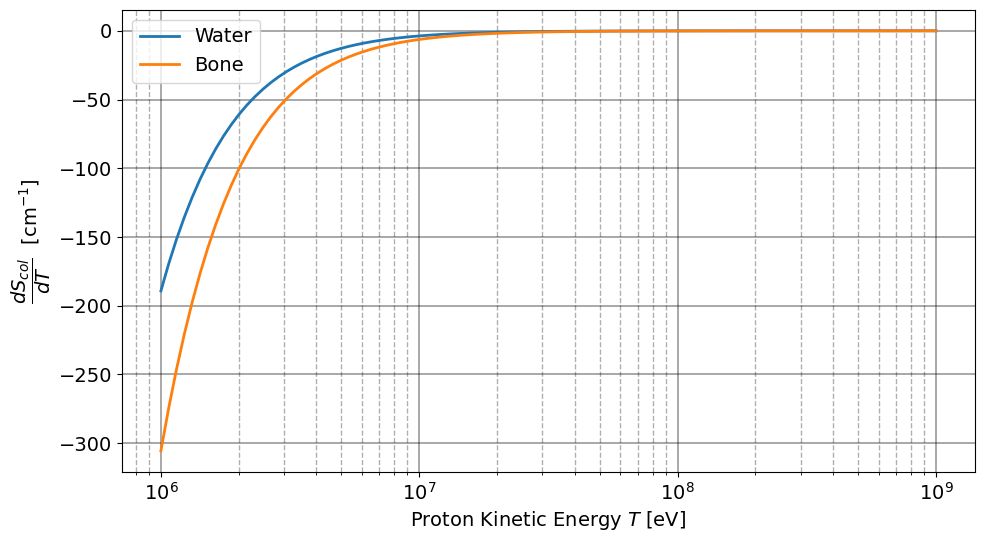

In [ ]:
water_density = 1.0e3                           # [kg/m^3]
water_mean_excitation_energy = 75.00 * cte.e    # [J]

water_Z_is = np.array([1, 8])
water_w_is = np.array([0.111894, 0.888106])
water_A_is = np.array([1.00794, 15.9994])

# bone data
bone_density = 1.85e3                          # [kg/m^3]
bone_mean_excitation_energy = 91.90 * cte.e    # [J]

bone_Z_is = np.array([1, 6, 7, 8, 12, 15, 16, 20])
bone_w_is = np.array([0.063984, 0.278000, 0.027000, 0.410016, 0.002000, 0.070000, 0.002000, 0.147000])
bone_A_is = np.array([1.00794, 12.011, 14.0067, 15.9994, 24.305, 30.97376, 32.066, 40.078])

Ts_eV = np.geomspace(1, 1000, 100) * 1e6    # 3e6 eV -> 1e9 eV
Ts_J = cte.e * Ts_eV                        # même range, mais en J

conv_factor = 1e-2    # m^-1 -> cm^-1

# calculate n_e for both meterials
water_n_e = calculate_n_e(
    rho=water_density,
    w_is=water_w_is,
    Z_is=water_Z_is,
    A_is=water_A_is
)
bone_n_e = calculate_n_e(
    rho=bone_density,
    w_is=bone_w_is,
    Z_is=bone_Z_is,
    A_is=bone_A_is
)
print(f"electronic density of water: {water_n_e} e⁻/m³\nelectronic density of bone: {bone_n_e} e⁻/m³")

# calculate Scol_dervtve for both meterials
water_Scol_dervtve = Scol_derivative(n_e=water_n_e, I=water_mean_excitation_energy, T=Ts_J)
bone_Scol_dervtve = Scol_derivative(n_e=bone_n_e, I=bone_mean_excitation_energy, T=Ts_J)

plt.figure(figsize=(11, 6))

plt.plot(Ts_eV, water_Scol_dervtve * conv_factor, lw=2, label="Water")
plt.plot(Ts_eV, bone_Scol_dervtve * conv_factor, lw=2, label="Bone")

plt.xlabel(r"Proton Kinetic Energy $T$ [eV]")
plt.ylabel(r"$\dfrac{dS_{col}}{dT}$  [cm$^{-1}$]")
plt.xscale('log')

plt.grid(True, which='major', linestyle='-', linewidth=1.2, alpha=0.4, color='k')
plt.grid(True, which='minor', linestyle='--', linewidth=1)
plt.legend()
plt.show()

## **Questions 8.**
**Rapportez vos portées calculées dans un tableau, qui comprendra aussi les erreurs d'approximation calculées (pour la méthode des trapèzes) et évaluées de façon pratique (pour les deux méthodes). Si vous êtes vraiment courageuse ou courageux, vous pourriez aussi calculer les erreurs d'approximation pour Simpson, mais restons-en à l'évaluation pratique de l'erreur pour ce cas. Commentez vos observations.**

Pour la méthode des trapèzes, on peut donner une erreur d’approximation calculée à partir de  $\max |f''(T)|$. Pour les deux méthodes, on évalue aussi une erreur pratique par comparaison de deux intégrales successives (Richardson) :

- Trapèzes : $\epsilon_{pratique} \approx |I_N - I_{N/2}|/3$
- Simpson : $\epsilon_{pratique} \approx |I_N - I_{N/2}|/15$

Le tableau suivant récapitule les portées $R_{CSDA}$ et les erreurs associées pour l’eau et l’os compact, avec les valeurs finales de $N$ utilisées plus haut.

In [ ]:
def trapeze_error_bound(f, a, b, N, num=20000):
    """
    Limite supérieur for trapezoidal error using a maximum |f''(T)|.
    """
    T = np.linspace(a, b, num)
    fvals = f(T)
    d2 = np.gradient(np.gradient(fvals, T), T)
    max_d2 = np.max(np.abs(d2))
    h = (b - a) / N
    return (b - a) * h ** 2 * max_d2 / 12.0

# Nouvelle fonction ϵ avec N et N/2 pour une estimation plus pratique de l'erreur
def calculate_practical_error_ϵ(I_N, I_half, method):
    """Erreur pratique avec multiplication par deux du nombre de tranches"""
    if method == "trap":
        return np.abs(I_N - I_half) / 3.0
    if method == "simp":
        return np.abs(I_N - I_half) / 15.0
    raise ValueError("Error !!!")


def build_table(material_name, N_trap, N_simp):
    rho, n_e, I = get_material_properties(material_name)
    f_inv_S = lambda T: (rho / calculate_S_col(n_e, I, T))

    T_low = 3e6 * cte.e
    T_high = 150e6 * cte.e

    # Trap results at N and N/2
    I_trap = trapeze(f_inv_S, T_low, T_high, N_trap)
    I_trap_half = trapeze(f_inv_S, T_low, T_high, N_trap // 2)

    # Simpson results at N and N/2 (must be even)
    I_simp = simpson(f_inv_S, T_low, T_high, N_simp)
    I_simp_half = simpson(f_inv_S, T_low, T_high, N_simp // 2)

    # Errors
    err_trap_calc = trapeze_error_bound(f_inv_S, T_low, T_high, N_trap)
    err_trap_prac = calculate_practical_error_ϵ(I_trap, I_trap_half, "trap")
    err_simp_prac = calculate_practical_error_ϵ(I_simp, I_simp_half, "simp")

    conv = 1e-1  # kg/m^2 -> g/cm^2
    return [
        {
            "Materiau": material_name,
            "Methode": "Trapezes",
            "N": N_trap,
            "R_CSDA [g/cm^2]": I_trap * conv,
            "Erreur approx (calc) [g/cm^2]": err_trap_calc * conv,
            "Erreur pratique [g/cm^2]": err_trap_prac * conv,
        },
        {
            "Materiau": material_name,
            "Methode": "Simpson",
            "N": N_simp,
            "R_CSDA [g/cm^2]": I_simp * conv,
            "Erreur approx (calc) [g/cm^2]": np.nan,
            "Erreur pratique [g/cm^2]": err_simp_prac * conv,
        },
    ]


In [ ]:
# Valeur finale de N pour les deux méthodes, obtenue précédement
N_trap_final = 2097152 
N_simp_final = 8192

rows = []
rows += build_table("water", N_trap_final, N_simp_final)
rows += build_table("bone", N_trap_final, N_simp_final)

q8_table = pd.DataFrame(rows)
q8_table

,Materiau,Methode,N,R_CSDA [g/cm^2],Erreur approx (calc) [g/cm^2],Erreur pratique [g/cm^2]
0,water,Trapezes,2097152,15.752946,7.224901e-12,5.002221e-13
1,water,Simpson,8192,15.752946,NaN,2.690588e-14
2,bone,Trapezes,2097152,16.944959,7.973360e-12,2.955858e-13
3,bone,Simpson,8192,16.944959,NaN,3.069545e-14


## **Optimisation**
**Supposons maintenant que l'on cherche à réduire au maximum le temps de calcul, disons pour évaluer en temps quasi-réel la portée de chaque proton individuel émanant de l'accélérateur et dont on connaîtrait précisément l'énergie. Ces protons ont une distribution en énergie pouvant être approximée par une distribution de Moyal, que vous pourrez générer avec ```scipy.stats.moyal``` avec les paramètres loc $=150$, scale $=4$ (unités en MeV).**



Une distribution de Moyal possède la forme présentée à la question 9. On cherche à calculer la portée $R_{CDSA}$ que chaque proton d'énergie cinétique $T$. Nous calculons ensuite le pouvoir d'arrêt pour ensuite l'intégrer avec une méthode rapide.

Nous allons utiliser la méthode de Simpson car elle nécessite moins de compute time pour arriver à une même précision. Nous allons utiliser un nombre de tranches qui garantit un calcul dans l'ordre de la ms.

In [ ]:


calculate_S_col()

## **Questions 9.**
**Utilisez ```moyal.rvs``` pour générer aléatoirement 10000 énergies tirées de cette distribution et tracez-la.**

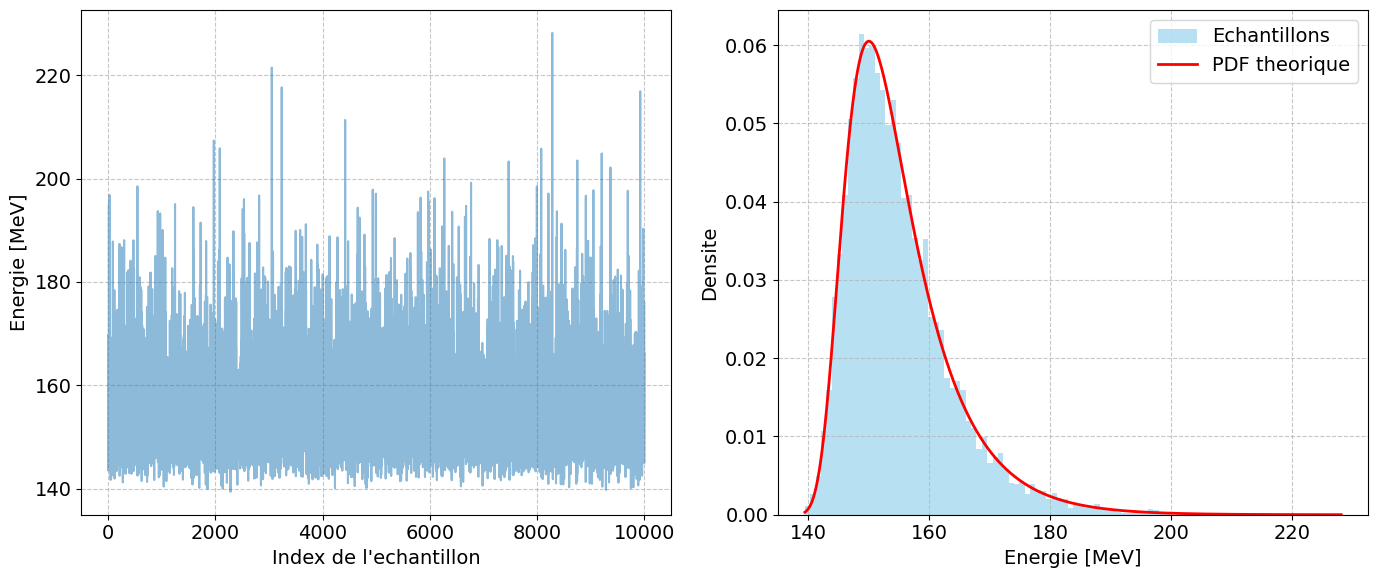

In [ ]:
moyal_loc, moyal_scale, moyal_size = 150.0, 4.0, 10000

sampling_mev = moyal.rvs(loc=moyal_loc, scale=moyal_scale, size=moyal_size)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(sampling_mev, markersize=1, alpha=0.5)
ax1.set_xlabel("Index de l'echantillon")
ax1.set_ylabel("Energie [MeV]")
ax1.grid(True, linestyle="--", alpha=0.7)

x = np.linspace(min(sampling_mev), max(sampling_mev), 1000)
ax2.hist(sampling_mev, bins=100, density=True, alpha=0.6, color="skyblue", label="Echantillons")
ax2.plot(x, moyal.pdf(x, loc=moyal_loc, scale=moyal_scale), "r-", lw=2, label="PDF theorique")
ax2.set_xlabel("Energie [MeV]")
ax2.set_ylabel("Densite")
ax2.legend()
ax2.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

## **Questions 10.**
**À l'aide du module timeit, vous estimerez le nombre de protons que vous pouvez calculer par seconde selon trois méthodes : vos implémentations des méthodes par trapèzes et Simpson ainsi que la fonction scipy.integrate.quad. Utilisez les 10000 valeurs d'énergie générées plus haut pour faire vos tests. Afin de comparer des pommes avec des pommes, vos calculs permettront tous d'atteindre la précision par défaut de la routine** ```scipy.integrate.quad```.

In [ ]:
# la précision par défaut de scipy.integrate.quad est 1.49e-8

ϵ_limit = 1.49e-6

#Q10_N_simp_final, Q10_water_R_CSDA_simp_values, water_ϵ_simp_values = calculate_R_CSDA_until_machine_error("water", simpson, ϵ_limit)
#print(f"Final number of slices for Simpson's method to reach error < {ϵ_limit}: {Q10_N_simp_final}")
#Q10_N_rect_final, Q10_water_R_CSDA_trap_values, water_ϵ_trap_values = calculate_R_CSDA_until_machine_error("water", trapeze, ϵ_limit)
#print(f"Final number of slices for Trapezoidal method to reach error < {ϵ_limit}: {Q10_N_rect_final}")

## **Questions 11.**
**Faites aussi un histogramme des portées obtenues pour ces 10000 protons et commentez la distribution obtenue.**



## **Énergie déposée**

**Il est possible de calculer l'énergie déposée pour un pas de déplacement du proton $s$ dans un milieu comme suit :**

$$
\begin{equation*}
s=\int_{T_{f}}^{T_{i}} \frac{\mathrm{dT}^{\prime}}{S_{c o l}} \tag{10}
\end{equation*}
$$

**où $T_{i}$ et $T_{f}$ sont les énergies cinétiques respectivement avant et après que le proton ait subi l'atténuation d'épaisseur $s$ du matériau.**


## **Questions 12.**
**Écrire un algorithme capable de réaliser le transport des protons subissant une décélération continue dans le milieu et tracer le dépôt d'énergie en fonction de la profondeur pour l'eau et l'os pour des proton d'énergie cinétique 150 MeV (faisceau monoénergétique). Votre courbe comportera un point où l'énergie déposée est nulle. La position de ce point est-elle conforme à vos résultats antérieurs sur la portée? Qu'est-ce qui influence sa valeur?**


## **Questions 13.**
**On nomme cette courbe le pic de Bragg. En déduire l'intérêt des protons pour la radiothérapie.**

Le pic de Bragg permet de cibler des régions très spécifiques dans le corps humain lors d'une opération. Cela signifie que la majorité des protons sont absorbés à une certaine distance de pénétration, ce qui permet de protéger des régions alentour saines qui ne doivent pas être touchées. Comme la radiothérapie cherche à tuer des cellules cancéreuses, le pic de Bragg est l'outil idéal pour atteindre la précision chirurgicale requise.

## **Questions 14.**
**Tracez la portée $R_{C S D A}$ des protons dans l'eau en fonction de l'énergie cinétique $T$ pour $50 \leq T \leq 200 \mathrm{MeV}$. Indiquez sur le graphique la profondeur $D=4 \mathrm{~cm}$ et déterminez graphiquement l'énergie du faisceau nécessaire pour atteindre cette profondeur.**

## **Questions 15.**
**En quoi les protons sont-ils préférables aux photons pour traiter un mélanome oculaire?**

Les protons sont préférables aux photons grâce au pic de Bragg, qui permet au faisceau de s'arrêter net après la tumeur sans irradier les tissus sains situés derrière. Cette précision chirurgicale est cruciale pour l'œil, car elle protège des structures vitales comme le nerf optique ou le cerveau, augmentant ainsi les chances de préserver la vision.

## **Questions 16.**
**Dans l'approche développée ici, les protons vont essentiellement en ligne droite dans la matière. Est-ce réaliste? Que devra-t-on éventuellement ajouter à notre modèle?**


Références


3. voir détails à https://en.wikipedia.org/wiki/Bethe_formula
4. voir https://physics.nist.gov/cgi-bin/Star/compos.pl?ap
5. http://physics.nist.gov/PhysRefData/Star/Text/PSTAR.html

In [ ]:
# Prevent caching of results by resetting global variables
#reset_globals_variables()